In [12]:


# arrays from numpy
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

import pandas as pd
import quandl
import math

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0
df = df[['HL_PCT','PCT_change','Adj. Close', 'Adj. Volume']]

forecast_col = 'Adj. Close'

# fill NaN with -99999
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(0.01*len(df))

df['label'] = df[forecast_col].shift(-forecast_out)

print(df.head())

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

Y = np.array(df['label'])



df.dropna(inplace=True)
#X = X[:-forecast_out+1]
#df.dropna(inplace=True)
y = np.array(df['label'])

print(len(X),len(y))

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
#clf = svm.SVR()
#clf = svm.SVR(kernel='poly')
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print(accuracy)

forecast_set = clf.predict(X_lately)

31.580000000000002
              HL_PCT  PCT_change  Adj. Close  Adj. Volume      label
Date                                                                
2004-08-19  3.712563    0.324968   50.322842   44659000.0  69.399229
2004-08-20  0.710922    7.227007   54.322689   22834300.0  68.752232
2004-08-23  3.729433   -1.227880   54.869377   18256100.0  69.639972
2004-08-24  6.417469   -5.726357   52.597363   15247300.0  69.078238
2004-08-25  1.886792    1.183658   53.164113    9188600.0  67.839414
3126 3126
0.969398253078


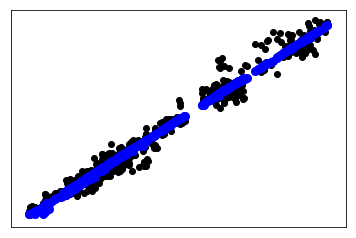

In [4]:
import matplotlib.pyplot as plt

# Plot outputs
col = 2
plt.scatter(X_test[:,col], y_test,  color='black')
plt.scatter(X_test[:,col], clf.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

32
              HL_PCT  PCT_change  Adj. Close  Adj. Volume      label  Forecast
Date                                                                          
2004-08-19  3.712563    0.324968   50.322842   44659000.0  69.399229       NaN
2004-08-20  0.710922    7.227007   54.322689   22834300.0  68.752232       NaN
2004-08-23  3.729433   -1.227880   54.869377   18256100.0  69.639972       NaN
2004-08-24  6.417469   -5.726357   52.597363   15247300.0  69.078238       NaN
2004-08-25  1.886792    1.183658   53.164113    9188600.0  67.839414       NaN
                     HL_PCT  PCT_change  Adj. Close  Adj. Volume  label  \
Date                                                                      
2017-08-26 01:00:00     NaN         NaN         NaN          NaN    NaN   
2017-08-27 01:00:00     NaN         NaN         NaN          NaN    NaN   
2017-08-28 01:00:00     NaN         NaN         NaN          NaN    NaN   
2017-08-29 01:00:00     NaN         NaN         NaN          NaN    N

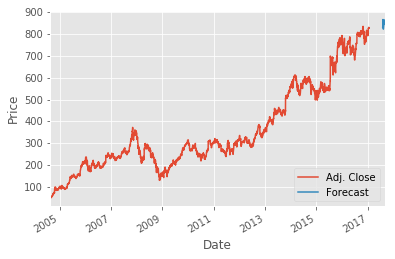

In [20]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

print(len(forecast_set))
print(df.head())
print(df.tail())
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
